# Permutation (randomization) and bootstrapping...non-parametraic statistics. 

## Developing test statistics and their distributions
In classic stats, we assume that there is some distirbution (e.g. a t-distribution) that reflects the true population distribution given a fixed sample size. Then we make a few measurements from our sample
population and we see how likely our measurement is compared to this
hypothetical population distribution. 

Why do we make this comparison of our sample mean against some hypothetical function (t-distribution)?
Why not just collect our data, and if we collect enough of it, then we
can just directly evaluate our confidence in the summary mean (and also
differences between conditions) without resorting to comparing with
hypothetical distributions...and we can do this using just the data we
have in hand (assuming a few basic conditions are met). This 
seems like a good idea, and given that resampling methods are now computationally
tractable its almost always a good idea to use them.

## Randomization tests
In a typical study, you collect data from two groups (or more) and then
you want to decide if the two group means are different given the separation 
of their means and their variances. So you compute the differences
between the means, weight that difference by the variance, and then
compare that test statistic again a standard look up table (e.g. a
t-distribution or similar) to see how likely our observed data are.  
This standard approach makes a number of assumptions:
* The data are normally distributed so that the test stat follows the expected distribution (i.e. a t-distribution)
* that we have taken truly random samples from the population(s) so that we can genearlize our results to the entire population
* The normal null hypothesis that mu1=mu2 based on where the difference between means falls against a standard statistic distribution (like the t-table). As the result of assumptions 1 and 2, we are then supposed  to infer that if we get a p<0.05 (or whatever out magic number is), then we can make an inference about the entire population (i.e. *inferential* stat).

In contrast, *RANDOMIZATION TESTING* does away with most of these assumptions in place of a different approach.
* We do not need normally distributed data, etc. In fact, we rarely seem to meet these conditions in real data anyway, so this is a pretty handy thing.
* We are not interested in making population inferences or accuractely estimate population means/std etc (see bootstrapping section below for that)  

The test statistic that we generate is not compared to a standard look up table - instead we generate our own 'null' distribution against which to compare the data that we actually observe with the goal of evaluating the propbability of observing a mean difference of X given that our condition labels (or our manipulation) had no effect. Under this null, the data could equally likely have come from either distribution. 

## Import our standard numpy and plotting stuff...also stats from scipy

In [2]:
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

## Start by generating some fake data from two experimental conditions. 

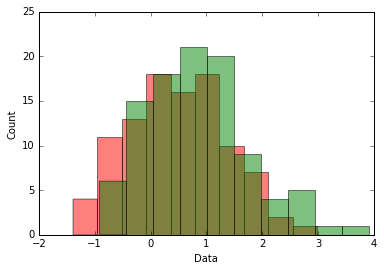

t-value:  -2.8  p-value:  0.00609691


In [39]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = .5,1      # means of each distribution
var_of_conditions = 1,1      # variance of each distribution - start with equal variance

# then use random.randn to generate two data sets with specified 
d1 = (np.random.randn(N,) + mu_of_conditions[0]) * var_of_conditions[0]
d2 = (np.random.randn(N,) + mu_of_conditions[1]) * var_of_conditions[1]

# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(d1, color='r', alpha=.5)
plt.hist(d2, color='g', alpha=.5)
plt.xlabel('Data')
plt.ylabel('Count')
plt.show()

t_val = stats.ttest_rel(d1,d2)
print('t-value: ', np.round(t_val.statistic,2), ' p-value: ', np.round(t_val.pvalue,8))

## now generate a set of t-values across repeated iterations of this 'study'

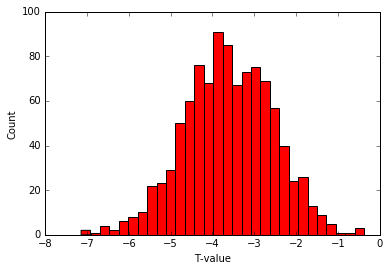

In [49]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = .5,1      # means of each distribution
var_of_conditions = 1,1     # variance of each distribution - start with equal variance, then make unequal

# number of repeats of the study
num_studies = 1000

# allocate array for storing t-values
study_t_val = np.zeros(num_studies)

for i in np.arange(num_studies):
    # then use random.randn to generate two data sets with specified 
    d1 = (np.random.randn(N,) + mu_of_conditions[0]) * var_of_conditions[0]
    d2 = (np.random.randn(N,) + mu_of_conditions[1]) * var_of_conditions[1]

    t_val = stats.ttest_rel(d1,d2)
    
    # store the t-value each time...
    study_t_val[i] = t_val.statistic
    
# histogram to show the data. 
# can specify the number of bins to use in the call to plt.hist
plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

## now do this the faster, numpy way...ditch the loop

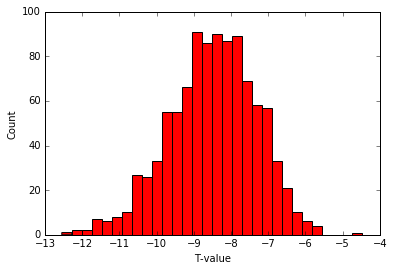

In [61]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = .5,1      # means of each distribution
var_of_conditions = 1,4     # variance of each distribution - start with equal variance, then make unequal

# number of repeats of the study
num_studies = 1000

# then use random.randn to generate two data sets with specified 
# instead of looping generate a N x num_studies matrix all at once 
d1 = (np.random.randn(N,num_studies) + mu_of_conditions[0]) * var_of_conditions[0]
d2 = (np.random.randn(N,num_studies) + mu_of_conditions[1]) * var_of_conditions[1]

# do the t-test on all columns of data (i.e. across rows, or across the first dim)
t_val = stats.ttest_rel(d1,d2,axis=0)
    
# store the t-value each time...
study_t_val = t_val.statistic
    
# histogram to show the data. Use alpha value to set transparency so that you can see overlap 
plt.hist(study_t_val, color='r', alpha=1, bins=30)
plt.xlabel('T-value')
plt.ylabel('Count')
plt.show()    

## now do a randomization version - shouldn't be subject to the same weirdness caused by breaking assumptions of the t-test (i.e. unequal variances)

8.61533067109e-17


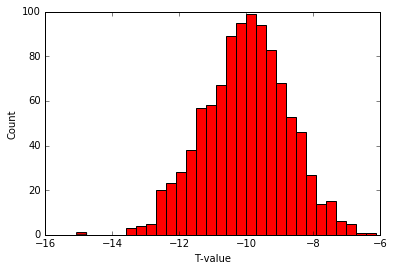

In [93]:
N = 100                      # number of data points (or 'subjects')
mu_of_conditions = .5,1      # means of each distribution
var_of_conditions = 1,80      # variance of each distribution - start with equal variance, then make unequal

# number of repeats of the study
num_studies = 1000

# then use random.randn to generate two data sets with specified 
# instead of looping generate a N x num_studies matrix all at once 
d1 = (np.random.randn(N,num_studies) + mu_of_conditions[0]) * var_of_conditions[0]
d2 = (np.random.randn(N,num_studies) + mu_of_conditions[1]) * var_of_conditions[1]

# do the t-test on all columns of data
# will write out the formula for the t-test here because it will make the randomization code 
# easier to understand: mean difference divided by the S.E. of the difference
study_t_val = np.mean(d1-d2, axis=0) / (np.std(d1-d2, axis=0) / np.sqrt(N-1))

# compare to output of stats.ttest_rel for sanity check
tmp_tval = stats.ttest_rel(d1,d2,axis=0)

# compute correlation between our t values and the stats computed t-vals...
# corrcoef will return a 2 x 2 matrix where the off-diagonal elements are the 
# correlation values for the two input vectors...so we want either the top right or the 
# bottom left value...can do that directly by indexing at the end of the function call!
cc = np.corrcoef(study_t_val, tmp_tval.statistic)[1][1]

# another quick sanity check - this should be 0 within machine precision
print(np.mean(study_t_val - tmp_tval.statistic))   

### now do the actual randomization testing
* Goal is to test the likelihood of observing our actual t-value under the null hypothesis that the experimental manipulation has no effect
* Another way of stating the null is that "condition labels shouldn't matter" (because if the condition has no effect, then shouldn't matter whether the data point came from condition A or B). 
* So we can randomly assign the data points as coming from either condition A or B, with the constraint that we keep the balance of data points in condition A and B the same as in the original data

In [ ]:
# how many times do we want to randomize the data and then eval our
# test statistic again?
num_randomizations = 1000

# allocate a matrix to store the output
rand_t = np.zeros(num_randomizations)

# start a loop
for i in np.arange(num_randomizations):
    

    study_t_val = np.mean(d1-d2, axis=0) / (np.std(d1-d2, axis=0) / np.sqrt(N-1))


## Using bootstrapping to estimate how well models generalize...

In [ ]:
from sklearn.utils import sk  # to get the resample function

In [ ]:
# generate a data set
data = [0.1, 0.2, 0.3, 0.4, 0.5, 0.6]

# prepare bootstrap sample
boot = resample(data, replace=True, n_samples=4, random_state=1)

print('Bootstrap Sample: %s' % boot)
# out of bag observations

oob = [x for x in data if x not in boot]

print('OOB Sample: %s' % oob)